<hr/>

# Intro to Data Science 

02/28/2020

**TA** - Dapeng Yao (dyao10@jhu.edu)   <br/>
**Office Hour** - Friday 12:30pm ~ 1:30pm Whitehead 212


<hr/>


### Excercise 1: linear regression using least squares

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Random data
N = 10
M = 2
input = np.random.random((N,M))
print(input)

[[0.68205069 0.80494841]
 [0.79935944 0.42388101]
 [0.84768738 0.85530353]
 [0.78407103 0.58650414]
 [0.00485911 0.40371001]
 [0.17421998 0.45330207]
 [0.67142538 0.26727621]
 [0.71125646 0.86264937]
 [0.92247909 0.28932099]
 [0.83350407 0.1018529 ]]


In [3]:
# Setup matrices
m = np.shape(input)[0]
X = np.matrix([np.ones(m), input[:,0]]).T
y = np.matrix(input[:,1]).T

In [4]:
# Solve for projection matrix
p_mat = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(p_mat)

[[0.46505582]
 [0.06191819]]


In [5]:
# Find regression line
xx = np.linspace(0, 1, 2)
yy = np.array(p_mat[0] + p_mat[1] * xx)

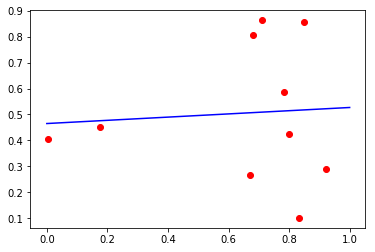

In [6]:
# Plot data, regression line
plt.figure(1)
plt.plot(xx, yy.T, color='b')
plt.scatter(input[:,0], input[:,1], color='r')
plt.show()

### Excercise 2: PCA application

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

In [8]:
np.random.seed(5)

In [9]:
# set centers and load iris dataset
centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

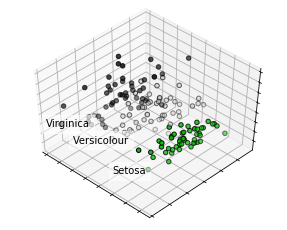

In [10]:
# plot the 3D graph after pca
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()

# note n_components = 3 
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

### Excercise 3: Gaussian Kernel PDF

> $\displaystyle \mathrm{KDE}(x) = \frac{1}{N}\sum_i K_h(x\!-\!x_i) = \frac{1}{Nh}\sum_i K\left(\frac{x\!-\!x_i}{h}\right)$

- The KDE is calculated by weighting the distances of all the data points. If we’ve seen more points nearby, the estimate is higher, indicating that probability of seeing a point at that location is higher. "Kernel" means how the point distances are weighted. 
- Changing the bandwidth changes the shape of the kernel: a lower bandwidth means only points very close to the current position are given any weight, which leads to the estimate looking squiggly; a higher bandwidth means a shallow kernel where distant points can contribute.
> Bandwidth selection 

In [11]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns

In [12]:
def kde_pdf(data, kernel_func, bandwidth):
    """Generate kernel density estimator over data."""
    kernels = dict()
    n = len(data)
    for d in data:
        kernels[d] = kernel_func(d, bandwidth)
    def evaluate(x):
        """Evaluate `x` using kernels above."""
        pdfs = list()
        for d in data: pdfs.append(kernels[d](x))
        return(sum(pdfs)/n)
    return(evaluate)

In [13]:
def gaussian_pdf(x_i, bandwidth):
    """Return Gaussian kernel density estimator."""
    x_bar  = x_i
    def evaluate(x):
        """Evaluate x."""
        pdf = (np.sqrt(2*np.pi*bandwidth**2)**-1) * np.exp(-((x - x_bar)**2)/(2*bandwidth**2))
        return(pdf)
    return(evaluate)

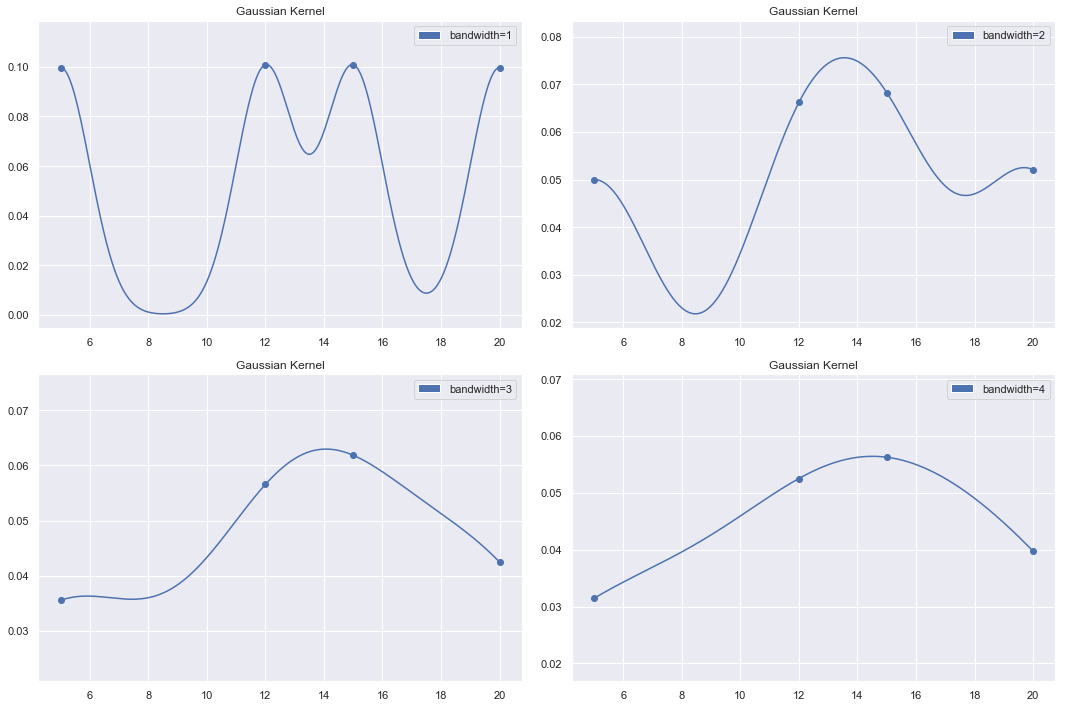

In [14]:
sns.set(color_codes=True)
plt.rcParams["figure.figsize"] = (15,10)


vals  = [5, 12, 15, 20]
avals = np.array(vals)
xvals = np.arange(min(vals), max(vals), .01)

fig = plt.figure()

# bandwidth=1:
ax1 = fig.add_subplot(2, 2, 1)
dist_1 = kde_pdf(data=vals, kernel_func=gaussian_pdf, bandwidth=1)
y1 = [dist_1(i) for i in xvals]
ys1 = [dist_1(i) for i in vals]
ax1.scatter(vals, ys1)
ax1.plot(xvals, y1)


# bandwidth=2:
ax2 = fig.add_subplot(2, 2, 2)
dist_2 = kde_pdf(data=vals, kernel_func=gaussian_pdf, bandwidth=2)
y2 = [dist_2(i) for i in xvals]
ys2 = [dist_2(i) for i in vals]
ax2.scatter(vals, ys2)
ax2.plot(xvals, y2)

# bandwidth=3:
ax3 = fig.add_subplot(2, 2, 3)
dist_3 = kde_pdf(vals, kernel_func=gaussian_pdf, bandwidth=3)
y3 = [dist_3(i) for i in xvals]
ys3 = [dist_3(i) for i in vals]
ax3.scatter(vals, ys3)
ax3.plot(xvals, y3)

# bandwidth=4:
ax4 = fig.add_subplot(2, 2, 4)
dist_4 = kde_pdf(vals, kernel_func=gaussian_pdf, bandwidth=4)
y4     = [dist_4(i) for i in xvals]
ys4    = [dist_4(i) for i in vals]
ax4.scatter(vals, ys4)
ax4.plot(xvals, y4)


# display gridlines 
g1 = ax1.grid(True)
g2 = ax2.grid(True)
g3 = ax3.grid(True)
g4 = ax4.grid(True)

# set title
t1=ax1.set_title(r"Gaussian Kernel")
t2=ax2.set_title(r"Gaussian Kernel")
t3=ax3.set_title(r"Gaussian Kernel")
t4=ax4.set_title(r"Gaussian Kernel")


# display legend in each subplot
leg1 = mpatches.Patch(color=None, label='bandwidth=1')
leg2 = mpatches.Patch(color=None, label='bandwidth=2')
leg3 = mpatches.Patch(color=None, label='bandwidth=3')
leg4 = mpatches.Patch(color=None, label='bandwidth=4')

ax1.legend(handles=[leg1])
ax2.legend(handles=[leg2])
ax3.legend(handles=[leg3])
ax4.legend(handles=[leg4])

plt.tight_layout()
plt.show()

Reference: 
- https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/
- https://mathisonian.github.io/kde/
- https://en.wikipedia.org/wiki/Kernel_density_estimation#Bandwidth_selection